In [1]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.86  Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 23.3 GB RAM, 75.0/476.9 GB disk)


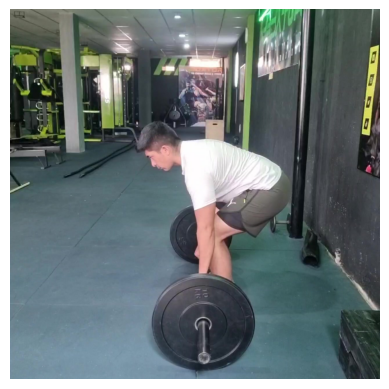

In [2]:
#path0='/content/46_051..jpg'
path0= 'D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_correcto/columna1_correcto/columna1_correcto_000003.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [3]:
path0= 'D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_correcto/columna1_correcto/columna1_correcto_000053.jpg'
model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')  # load an official model
# Predict with the model
results = model.track(path0,show =False, imgsz=[640, 640] )


image 1/1 D:\InteligenciaArtificial3\Datasets\peso_muerto\columna_correcto\columna1_correcto\columna1_correcto_000053.jpg: 640x640 2 persons, 14.6ms
Speed: 184.6ms preprocess, 14.6ms inference, 665.0ms postprocess per image at shape (1, 3, 640, 640)


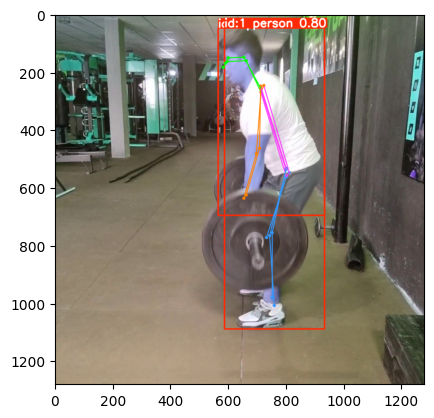

In [4]:
annotated_frame = results[0].plot()
plt.imshow(annotated_frame)#, cv2.COLOR_BGR2RGB)
plt.show()

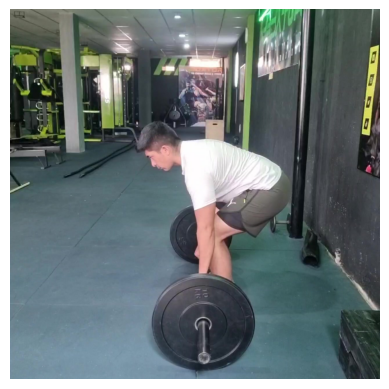

In [5]:
path0='D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_correcto/columna1_correcto/columna1_correcto_000003.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [6]:
print(len(results[0].boxes))

2


In [7]:
BOX=pd.DataFrame(columns=range(7))
for i in range(len(results)):
    arri = pd.DataFrame(results[0].boxes.data.cpu()).astype(float)  # Copiar a la CPU antes de convertir a NumPy
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','id','confidence','class','']
display(BOX)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20152\800592531.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  BOX=pd.concat([BOX,arri],axis=0)


,x,y,x2,y2,id,confidence,class,
0,586.048584,46.989624,932.360840,1089.664551,1.0,0.804944,0.0,0.0
1,564.939941,48.659058,932.655518,696.164673,2.0,0.783442,0.0,0.0


In [8]:
a=len(results[0].boxes)
print(a)
for i in range(a):
  if results[0].boxes.id[i] == 1:
    points=results[i].keypoints[i].xyn.data.cpu().numpy()
    ls=[]
    matriz_np = np.array(points)
    matriz_aplanada_np = matriz_np.flatten()
    valor=matriz_aplanada_np.tolist()
    ls.append(valor)
    print(ls)

2
[[0.4608151614665985, 0.13346830010414124, 0.46850690245628357, 0.11797499656677246, 0.0, 0.0, 0.5104479789733887, 0.11701717227697372, 0.0, 0.0, 0.5555577874183655, 0.20016126334667206, 0.5556710362434387, 0.19508428871631622, 0.5530259013175964, 0.36314812302589417, 0.0, 0.0, 0.5166951417922974, 0.4895208477973938, 0.0, 0.0, 0.6242673993110657, 0.42104360461235046, 0.6244608759880066, 0.41678667068481445, 0.5798401236534119, 0.5991552472114563, 0.5870193839073181, 0.5913563370704651, 0.5928604006767273, 0.7875177264213562, 0.5874335169792175, 0.7669750452041626]]


In [9]:
df = pd.DataFrame(ls)
print(df)
df.to_csv("prueba"+".txt")

         0         1         2         3    4    5         6         7    8   \
0  0.460815  0.133468  0.468507  0.117975  0.0  0.0  0.510448  0.117017  0.0   

    9   ...        24        25       26        27        28        29  \
0  0.0  ...  0.624461  0.416787  0.57984  0.599155  0.587019  0.591356   

        30        31        32        33  
0  0.59286  0.787518  0.587434  0.766975  

[1 rows x 34 columns]


In [16]:
import os
import cv2
from ultralytics import YOLO

# Directorio principal que contiene subcarpetas con imágenes
directorio_principal = "D:/InteligenciaArtificial3/Datasets/peso_muerto/extension_correcto"

# Directorio donde se guardarán los resultados
directorio_resultados = "D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_correcto"
resultados_carpeta_actual = []
# Load the YOLOv8 model
for carpeta in os.listdir(directorio_principal):
    print("entro",carpeta)
    carpeta_actual = os.path.join(directorio_principal, carpeta)
    if os.path.isdir(carpeta_actual):
        # Crear una nueva instancia del modelo YOLO para cada carpeta
        model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')
        
        # Carpeta donde se guardarán los resultados para esta carpeta
        carpeta_resultados = os.path.join(directorio_resultados, carpeta+"_resultados")
        os.makedirs(carpeta_resultados, exist_ok=True)
        
        # Procesar cada imagen en la carpeta actual
        for archivo in os.listdir(carpeta_actual):
            ruta_archivo = os.path.join(carpeta_actual, archivo)
            # Leer el fotograma del archivo
            frame = cv2.imread(ruta_archivo)

            # Run YOLO tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True)
            # Verificar si hay detecciones antes de acceder a results[0].boxes
            if results[0].boxes is None or results[0].boxes.id is None:
                print(f"No se detectaron objetos en {archivo}, saltando...")
                continue  # Saltar esta imagen y pasar a la siguiente

            a = len(results[0].boxes)
            print(f"Detecciones en {archivo}: {a}")
            for i in range(a):
                if results[0].boxes.id[i] == 1:
                    keypoints_de_interes = results[0].keypoints[i].xyn.data.cpu().numpy()
                    matriz_np = np.array(keypoints_de_interes)
                    matriz_aplanada_np = matriz_np.flatten()
                    valor = matriz_aplanada_np.tolist()
                    resultados_carpeta_actual.append(valor)
            # Visualize the results on the frame
            annotated_frame = results[0].plot()
            # Guardar el resultado en la carpeta 'malos_resultados' específica para esta carpeta
            cv2.imwrite(os.path.join(carpeta_resultados, archivo), annotated_frame)

# Informar que la operación ha finalizado
print("Proceso completado.")


entro extension1_correcto

0: 640x640 2 persons, 60.5ms
Speed: 5.9ms preprocess, 60.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_correcto_000025.jpg: 2

0: 640x640 2 persons, 13.1ms
Speed: 2.9ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_correcto_000026.jpg: 2

0: 640x640 2 persons, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_correcto_000027.jpg: 2

0: 640x640 2 persons, 13.2ms
Speed: 3.1ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_correcto_000028.jpg: 2

0: 640x640 1 person, 12.9ms
Speed: 3.0ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_correcto_000029.jpg: 1

0: 640x640 1 person, 28.0ms
Speed: 3.1ms preprocess, 28.0ms inference, 4.2ms postprocess per i

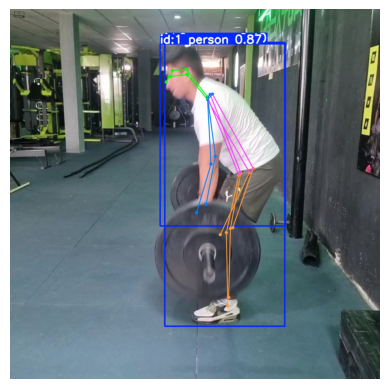

In [17]:
path0= 'D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_correcto/extension1_correcto_resultados/extension1_correcto_000025.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [18]:
b=resultados_carpeta_actual
print(len(b))
df = pd.DataFrame(resultados_carpeta_actual)
print(df)

143
           0         1         2         3    4    5         6         7   \
0    0.422368  0.197379  0.429777  0.183151  0.0  0.0  0.478531  0.177277   
1    0.422693  0.176711  0.434806  0.163279  0.0  0.0  0.489352  0.163699   
2    0.437114  0.163362  0.446274  0.148955  0.0  0.0  0.496541  0.145715   
3    0.445004  0.149555  0.453394  0.135013  0.0  0.0  0.502434  0.133410   
4    0.411992  0.101934  0.424042  0.085531  0.0  0.0  0.478525  0.086634   
..        ...       ...       ...       ...  ...  ...       ...       ...   
138  0.374661  0.226980  0.382520  0.212099  0.0  0.0  0.427363  0.208400   
139  0.377291  0.213721  0.384622  0.199321  0.0  0.0  0.433195  0.194928   
140  0.382158  0.206770  0.390630  0.192330  0.0  0.0  0.435369  0.189596   
141  0.384931  0.196495  0.393187  0.181190  0.0  0.0  0.437936  0.177490   
142  0.388532  0.182868  0.397226  0.168085  0.0  0.0  0.442032  0.167188   

      8    9   ...        24        25        26        27        28  \

In [19]:
df.to_csv("extension_correctos"+".txt")

In [20]:
import os
import cv2
from ultralytics import YOLO

# Directorio principal que contiene subcarpetas con imágenes
directorio_principal = "D:/InteligenciaArtificial3/Datasets/peso_muerto/extension_incorrecto"

# Directorio donde se guardarán los resultados
directorio_resultados = "D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_incorrecto"
resultados_carpeta_actual2 = []
# Load the YOLOv8 model
for carpeta in os.listdir(directorio_principal):
    print("entro",carpeta)
    carpeta_actual = os.path.join(directorio_principal, carpeta)
    if os.path.isdir(carpeta_actual):
        # Crear una nueva instancia del modelo YOLO para cada carpeta
        model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')
        
        # Carpeta donde se guardarán los resultados para esta carpeta
        carpeta_resultados = os.path.join(directorio_resultados, carpeta+"_resultados")
        os.makedirs(carpeta_resultados, exist_ok=True)
        
        # Procesar cada imagen en la carpeta actual
        for archivo in os.listdir(carpeta_actual):
            ruta_archivo = os.path.join(carpeta_actual, archivo)
            # Leer el fotograma del archivo
            frame = cv2.imread(ruta_archivo)

            # Run YOLO tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True)
            # Verificar si hay detecciones antes de acceder a results[0].boxes
            if results[0].boxes is None or results[0].boxes.id is None:
                print(f"No se detectaron objetos en {archivo}, saltando...")
                continue  # Saltar esta imagen y pasar a la siguiente

            a = len(results[0].boxes)
            print(f"Detecciones en {archivo}: {a}")
            for i in range(a):
                if results[0].boxes.id[i] == 1:
                    keypoints_de_interes = results[0].keypoints[i].xyn.data.cpu().numpy()
                    matriz_np = np.array(keypoints_de_interes)
                    matriz_aplanada_np = matriz_np.flatten()
                    valor = matriz_aplanada_np.tolist()
                    resultados_carpeta_actual2.append(valor)
            # Visualize the results on the frame
            annotated_frame = results[0].plot()
            # Guardar el resultado en la carpeta 'malos_resultados' específica para esta carpeta
            cv2.imwrite(os.path.join(carpeta_resultados, archivo), annotated_frame)

# Informar que la operación ha finalizado
print("Proceso completado.")


entro extension1_incorrecto

0: 640x640 2 persons, 60.4ms
Speed: 5.7ms preprocess, 60.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_incorrecto_000035.jpg: 2

0: 640x640 2 persons, 54.0ms
Speed: 5.7ms preprocess, 54.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_incorrecto_000036.jpg: 2

0: 640x640 2 persons, 52.2ms
Speed: 5.6ms preprocess, 52.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_incorrecto_000037.jpg: 2

0: 640x640 2 persons, 28.3ms
Speed: 4.3ms preprocess, 28.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_incorrecto_000038.jpg: 2

0: 640x640 1 person, 28.2ms
Speed: 4.5ms preprocess, 28.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension1_incorrecto_000039.jpg: 1

0: 640x640 1 person, 28.4ms
Speed: 4.8ms preprocess, 28.4ms inference, 2.3ms postp

In [21]:
df = pd.DataFrame(resultados_carpeta_actual2)
print(df)
df.to_csv("extension_incorrectos"+".txt")

            0         1         2         3         4         5         6   \
0     0.403369  0.221167  0.404596  0.203060  0.000000  0.000000  0.443920   
1     0.407584  0.197511  0.410442  0.179787  0.000000  0.000000  0.452094   
2     0.419198  0.182348  0.421336  0.164994  0.000000  0.000000  0.462628   
3     0.424431  0.152747  0.429642  0.136264  0.000000  0.000000  0.477393   
4     0.406207  0.110620  0.411784  0.092108  0.000000  0.000000  0.460907   
...        ...       ...       ...       ...       ...       ...       ...   
1245  0.603174  0.120062  0.622586  0.108615  0.605544  0.107646  0.657174   
1246  0.607596  0.120912  0.627216  0.109537  0.610455  0.109393  0.662128   
1247  0.616761  0.128191  0.634068  0.114347  0.000000  0.000000  0.665739   
1248  0.617544  0.129953  0.638056  0.119243  0.619552  0.117458  0.670794   
1249  0.619637  0.131620  0.639810  0.121338  0.620737  0.118352  0.671025   

            7    8    9   ...        24        25        26    